# Used Car Prediction using Random Forest Regressor

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import re

In [3]:
#Load dataset
df = pd.read_csv('used_cars dataset.csv')
print(df.columns)
train_df = pd.read_csv('used_cars dataset.csv')
test_df = train_df.copy() 

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [4]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [5]:
df.shape

(4009, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [7]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['accident'] = df['accident'].fillna(df['accident'].mode()[0])
df['clean_title'] = df['clean_title'].fillna(df['clean_title'].mode()[0])


In [9]:
# Remove non-numeric characters from 'milage' and 'price' columns
df['milage'] = df['milage'].str.replace(r'\D', '', regex=True).astype(float)
df['price'] = df['price'].str.replace(r'[^0-9]', '', regex=True).astype(float)

In [10]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Yes,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,34999.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


Add new feature 'Premium Brands' for brands such as BMW, Ferrari, etc.

In [12]:
# Add more luxury brands like Lamborghini, Bugatti, and Hellcat
premium_brands = ['BMW', 'Mercedes', 'Audi', 'Lexus', 'Porsche', 'Jaguar',
                  'Lamborghini', 'Bugatti', 'Hellcat', 'Ferrari', 'Maserati',
                  'Rolls-Royce', 'Aston Martin', 'Bentley', 'McLaren']

# Create a binary feature indicating whether a car is from a premium brand
df['premium_brand'] = df['brand'].apply(lambda x: 1 if any(brand in x for brand in premium_brands) else 0)

In [13]:
# Perform one-hot encoding on categorical features
df = pd.get_dummies(df, columns=['brand', 'model', 'transmission', 'fuel_type', 'clean_title', 'accident', 'int_col', 'ext_col'], drop_first=True)

In [14]:
df.head()

,model_year,milage,engine,price,premium_brand,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,ext_col_White Platinum Tri-Coat Metallic,ext_col_Wind Chill Pearl,ext_col_Wolf Gray,ext_col_Yellow,ext_col_Yulong,ext_col_Yulong White,ext_col_designo Diamond White,ext_col_designo Diamond White Bright,ext_col_designo Diamond White Metallic,ext_col_–
0,2013,51000.0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,10300.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2021,34742.0,3.8L V6 24V GDI DOHC,38005.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2022,22372.0,3.5 Liter DOHC,54598.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,88900.0,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,15500.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2021,9835.0,2.0L I4 16V GDI DOHC Turbo,34999.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Added new features  Engine Size, Cylinder Count, and whether the car is Electric or not

In [15]:
# Define a function to extract engine size (in liters)
def extract_engine_liter(engine_desc):
    match = next((float(m.group(1)) for m in re.finditer(r'(\d+\.\d+|\d+)\s*(?:L|liter)', engine_desc)), np.nan)
    return match

#\d+ → Matches one or more digits
#\d+\.\d+ → Matches decimal numbers
#\s* Matches optional spaces between the number and the unit (L or liter)
#(?:L|liter) Matches either "L" or "liter" but does not capture it (?: makes it a non-capturing group).

**Extract Cylinder Count**

In [16]:
def extract_cylinder_count(engine_desc):
    if not isinstance(engine_desc, str):
        return np.nan  # Handle non-string inputs safely

    engine_desc = engine_desc.lower().replace("-", " ")  # Normalize text (e.g., "6-cylinder" → "6 cylinder")

    if "electric" in engine_desc:
        return 0  # Electric cars have no cylinders

    match = re.search(r'(i\d+|v\d+|straight \d+|\d+ cylinder)', engine_desc, re.IGNORECASE)
    
    if match:
        # Standardized mapping of engine descriptions to cylinder counts
        cylinder_mapping = {
            'i4': 4, '4 cylinder': 4, 'i6': 6, 'v6': 6, 'v8': 8, 'v10': 10, 'v12': 12, 
            'straight 6': 6, '3 cylinder': 3, '6 cylinder': 6, '8 cylinder': 8, 
            '10 cylinder': 10, '12 cylinder': 12
        }

        engine_type = match.group(0).strip().lower()  # Normalize case for lookup
        return cylinder_mapping.get(engine_type, np.nan)  # Return mapped value or NaN if not found

    return np.nan  # Return NaN if no match is found


In [17]:
# Define a function to check if the car is electric
def is_electric(engine_desc):
    if 'electric' in engine_desc.lower():
        return 1  # Electric car
    return 0  # Not electric

In [18]:
# Apply functions to process the engine descriptions
df['engine_liter'] = df['engine'].apply(extract_engine_liter)
df['cylinder_count'] = df['engine'].apply(extract_cylinder_count)
df['is_electric'] = df['engine'].apply(is_electric)

In [19]:
df.isnull().sum()

model_year                                  0
milage                                      0
engine                                      0
price                                       0
premium_brand                               0
                                         ... 
ext_col_designo Diamond White Metallic      0
ext_col_–                                   0
engine_liter                              217
cylinder_count                            307
is_electric                                 0
Length: 2502, dtype: int64

filling the missing values in **engine_liter** (mean) and **cylinder_count** (mode)

In [20]:
# Impute missing engine_liter values with the mean of the column
df['engine_liter'] = df['engine_liter'].fillna(df['engine_liter'].mean())
# Impute missing cylinder_count values with the mode (most frequent value) of the column
df['cylinder_count'] = df['cylinder_count'].fillna(df['cylinder_count'].mode()[0])

In [21]:
df.head()

,model_year,milage,engine,price,premium_brand,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,...,ext_col_Yellow,ext_col_Yulong,ext_col_Yulong White,ext_col_designo Diamond White,ext_col_designo Diamond White Bright,ext_col_designo Diamond White Metallic,ext_col_–,engine_liter,cylinder_count,is_electric
0,2013,51000.0,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,10300.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,3.7,6.0,0
1,2021,34742.0,3.8L V6 24V GDI DOHC,38005.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,3.8,6.0,0
2,2022,22372.0,3.5 Liter DOHC,54598.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,3.5,6.0,0
3,2015,88900.0,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,15500.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,3.5,0.0,1
4,2021,9835.0,2.0L I4 16V GDI DOHC Turbo,34999.0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,2.0,4.0,0


In [22]:
df.drop(columns=['engine'], inplace=True)
df.head()

,model_year,milage,price,premium_brand,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,ext_col_Yellow,ext_col_Yulong,ext_col_Yulong White,ext_col_designo Diamond White,ext_col_designo Diamond White Bright,ext_col_designo Diamond White Metallic,ext_col_–,engine_liter,cylinder_count,is_electric
0,2013,51000.0,10300.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3.7,6.0,0
1,2021,34742.0,38005.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3.8,6.0,0
2,2022,22372.0,54598.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3.5,6.0,0
3,2015,88900.0,15500.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3.5,0.0,1
4,2021,9835.0,34999.0,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,2.0,4.0,0


In [23]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold as 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows with outliers in the 'price' column
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Split the filtered dataset into features (X) and target (y)
X = df_filtered.drop(columns=['price'])
y = df_filtered['price']

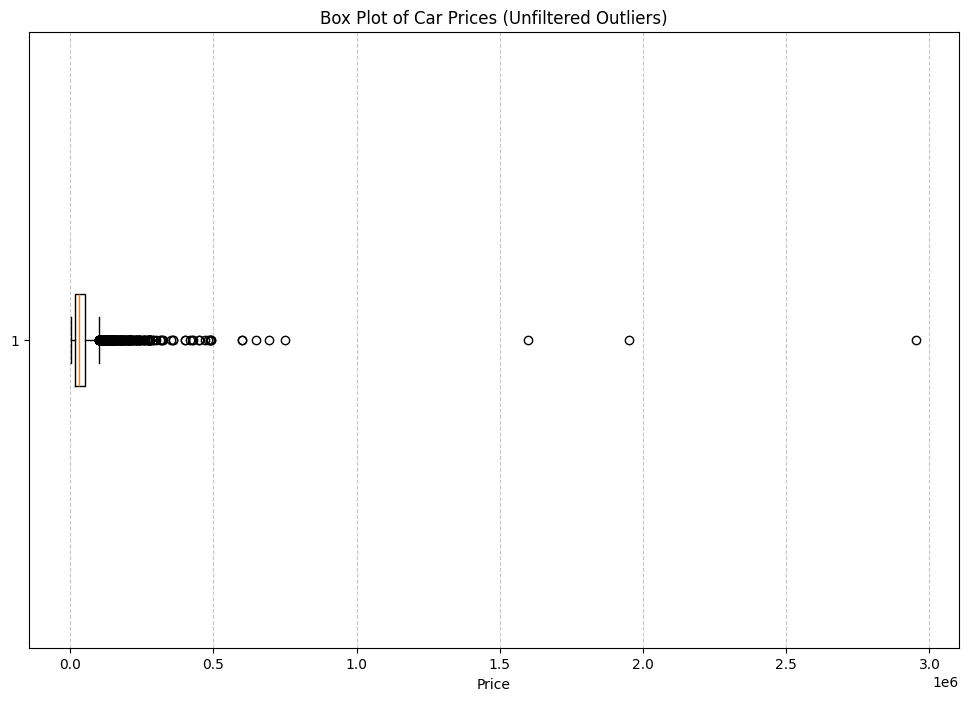

In [24]:
# Box plot for car prices
plt.figure(figsize=(12, 8))
plt.boxplot(df['price'], vert=False)
plt.title("Box Plot of Car Prices (Unfiltered Outliers)")
plt.xlabel("Price")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

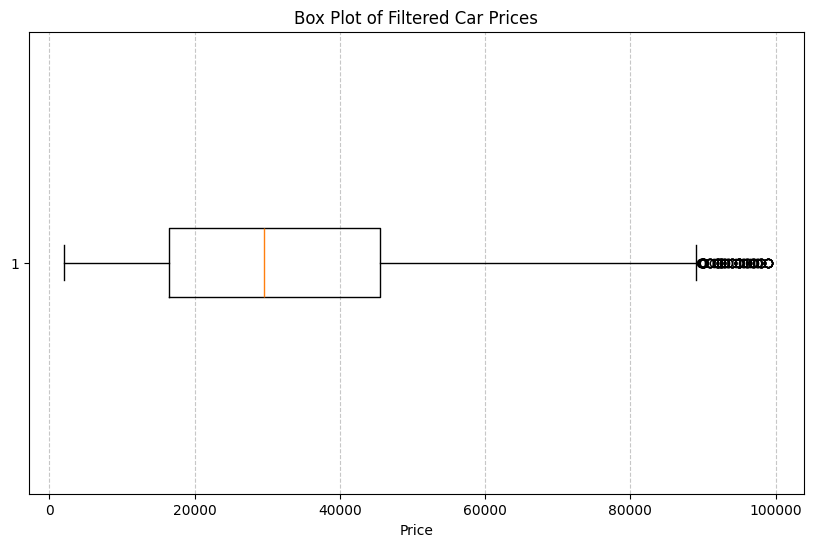

In [25]:
# Box plot for filtered car prices
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['price'], vert=False)
plt.title("Box Plot of Filtered Car Prices")
plt.xlabel("Price")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Show the number of rows before and after filtering outliers
original_count = len(df)
filtered_count = len(df_filtered)

print(f"Number of rows before filtering outliers: {original_count}")
print(f"Number of rows after filtering outliers: {filtered_count}")
print(f"Number of rows removed: {original_count - filtered_count}")

Number of rows before filtering outliers: 4009
Number of rows after filtering outliers: 3765
Number of rows removed: 244


In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Regressor model

In [28]:
# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [29]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_train_pred = rf_regressor.predict(X_train)

In [31]:
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_train_pred) * 100:.2f}%")
print(f"R^2 Score: {r2_score(y_train, y_train_pred)}")

Mean Absolute Error: 2352.9214973439575
Mean Absolute Percentage Error: 8.86%
R^2 Score: 0.9736955408720992


In [32]:
y_pred = rf_regressor.predict(X_test)

In [33]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error: 6353.273612217795
Mean Absolute Percentage Error: 23.26%
R^2 Score: 0.7963422257719668


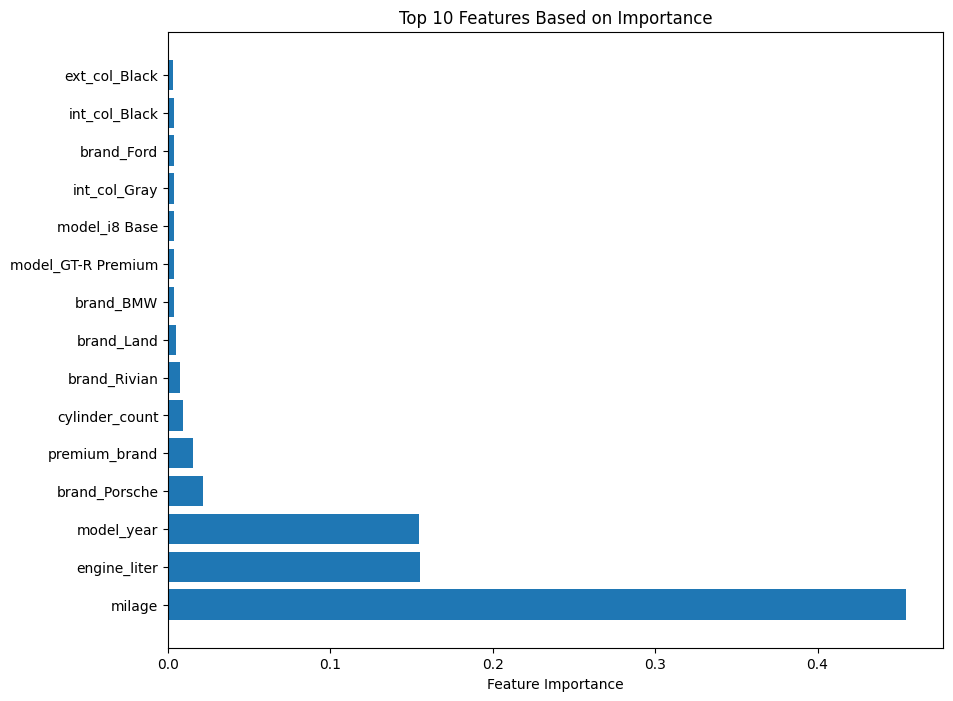

In [34]:
# Feature importance
feature_importance = rf_regressor.feature_importances_

# Get the top 15 most important features
indices = np.argsort(feature_importance)[::-1]  # Sort in descending order

# Top 10 feature names
top_10_features = [X.columns[i] for i in indices[:15]]
top_10_importances = feature_importance[indices[:15]]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_10_features, top_10_importances)
plt.xlabel("Feature Importance")
plt.title("Top 10 Features Based on Importance")
plt.show()

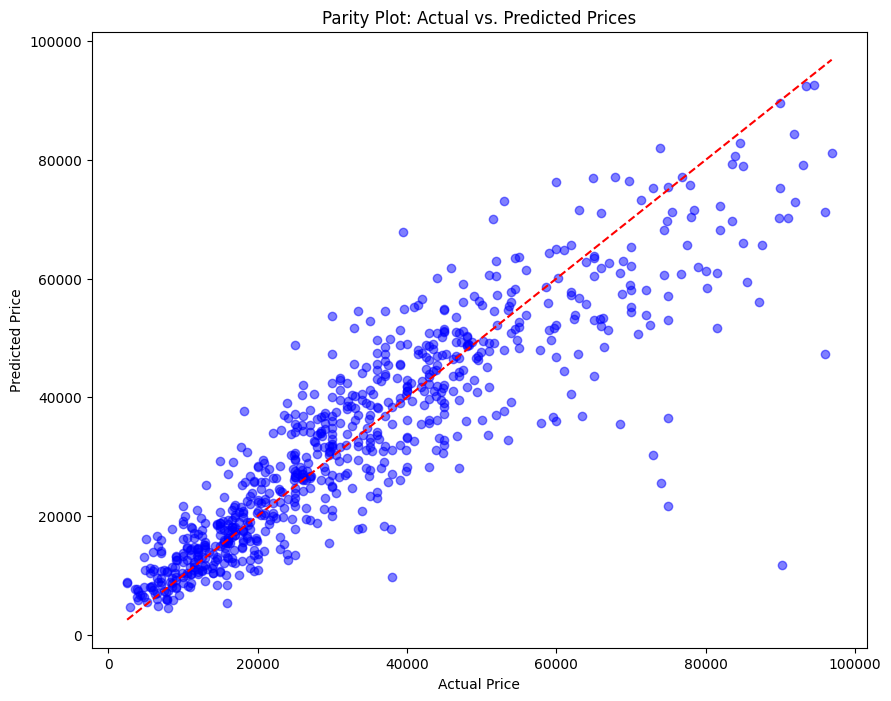

In [35]:
# Parity Plot: Actual vs. Predicted Prices
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Parity Plot: Actual vs. Predicted Prices")
plt.show()

The above graph compares predicted vs. actual values in a regression model.
If a model is perfect, all predicted values (y_pred) would lie exactly on this line. and any deviation from the line shows errors in predictions.

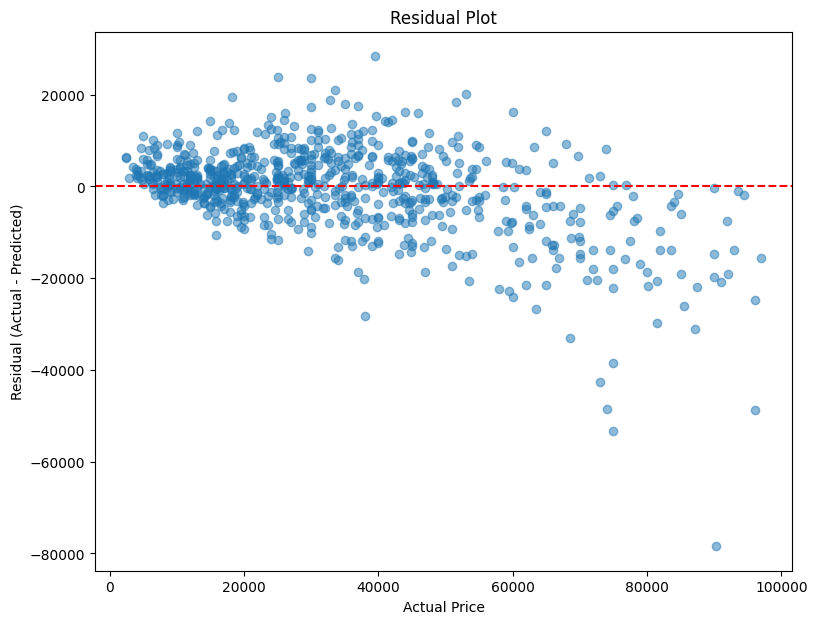

In [36]:
# Residual Plot
plt.figure(figsize=(9, 7))
plt.scatter(y_test, y_pred - y_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

A residual plot is a graph that helps analyze the errors (residuals) in a regression model.
It Checks if the model fits well and identifies patterns in errors (heteroscedasticity, non-linearity, etc.) and also detects outliers and model assumptions violations.

**Good Model (Randomly Scattered Residuals)**
- If the residuals are randomly distributed around zero, the model is good.
- No visible pattern = errors are randomly spread → Model is likely correct.

**Bad Model (Patterns in Residuals)**
- Curved pattern → The model fails to capture some trend → Non-linearity issue.
- Increasing or decreasing spread → Variance is not constant → Heteroscedasticity issue.
- Clusters of residuals → The model is missing some important features.